# Project title: Categorizing figures from biomedical research articles using deep neural networks and Bioassays Ontology (BAO) categories


#### Student Name: Arsalan Zaid
#### Student ID: 2598349Z

In [1]:
#Importing tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization

import numpy as np #multi-dimensional array
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualization
%matplotlib inline
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import json
import seaborn as sns #data visualization

#Importing keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from keras.layers import BatchNormalization
from keras.preprocessing import image

In [25]:
#loading labels
label = pd.read_json('labels.json')
label.head(8)

,panel_id,bao_categories,paper_id
0,100048,[immunoblot],SD5967
1,100054,"[immunoblot, phosphorylation assay]",SD5967
2,100068,"[immunoblot, phosphorylation assay]",SD5967
3,100077,"[gene expression assay, quantitative reverse t...",SD5967
4,100086,"[gene expression assay, quantitative reverse t...",SD5967
5,100094,"[gene expression assay, quantitative reverse t...",SD5967
6,100105,"[bacterial infection method, localization assay]",SD5967
7,100114,[bacterial infection method],SD5967


In [26]:
#One Hot encoding in multi-label using MultiLabel Binarizer
#Coverting categorical BAO categories into binary

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df = pd.DataFrame(mlb.fit_transform(label['bao_categories']),columns=mlb.classes_)


In [27]:
#BAO categories dataframe
df.head(5)

,ATP quantitation,AUC,BacTiter-Glo Microbial Cell Viability Assay,Celigo S Imaging Cell Cytometer,CellTiter-Glo Luminescent Cell Viability Assay,Coomassie dye protein staining,Ct,DNA-RNA interaction assay,Dual-Luciferase Reporter Assay System,EC50,...,trypan blue cell staining,two-hybrid assay,viability measurement method,viral transduction method,vital dye staining,vital staining of cells,vital staining of organelles,voltage clamp,western blot,yeast two-hybrid assay
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


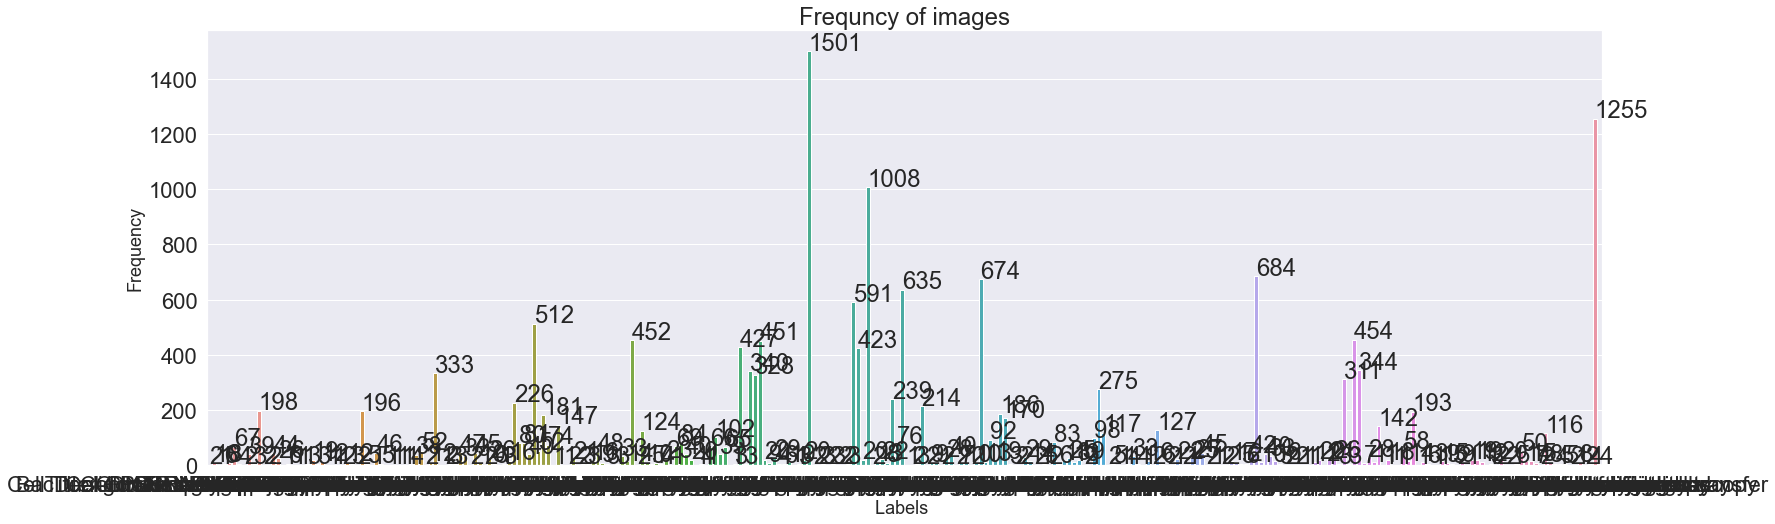

In [5]:
#occurrences of BAO categories in images
categories = list(df.columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(25,8))
ax= sns.barplot(categories, df.iloc[:,:].sum().values)
plt.title("Frequncy of images", fontsize=24)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Labels ', fontsize=18)
r = ax.patches
freq = df.iloc[:,:].sum().values
#freq = np.sort(freq)[::-1]
for rect, label in zip(r, freq):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label)
plt.show()

In [6]:
#Counts of BAO categories in descending order
freq = df.iloc[:,:].sum().values
freq= np.sort(freq)[::-1]
freq

array([1501, 1255, 1008,  684,  674,  635,  591,  512,  454,  452,  451,
        427,  423,  344,  340,  333,  328,  311,  275,  239,  226,  214,
        198,  196,  193,  186,  181,  170,  147,  142,  127,  124,  117,
        116,  102,   98,   92,   84,   83,   81,   80,   76,   74,   69,
         67,   66,   65,   58,   52,   52,   50,   48,   47,   46,   45,
         45,   44,   42,   40,   40,   40,   40,   39,   39,   38,   33,
         33,   33,   33,   29,   29,   28,   28,   27,   26,   26,   26,
         25,   25,   23,   22,   22,   21,   21,   20,   20,   20,   20,
         20,   20,   19,   19,   19,   19,   19,   18,   18,   17,   16,
         16,   16,   16,   15,   15,   14,   14,   14,   14,   13,   13,
         13,   13,   12,   12,   12,   12,   12,   12,   11,   10,   10,
         10,   10,   10,   10,   10,    9,    9,    9,    9,    9,    9,
          8,    8,    8,    8,    7,    7,    7,    7,    6,    6,    6,
          6,    6,    6,    6,    6,    5,    5,   

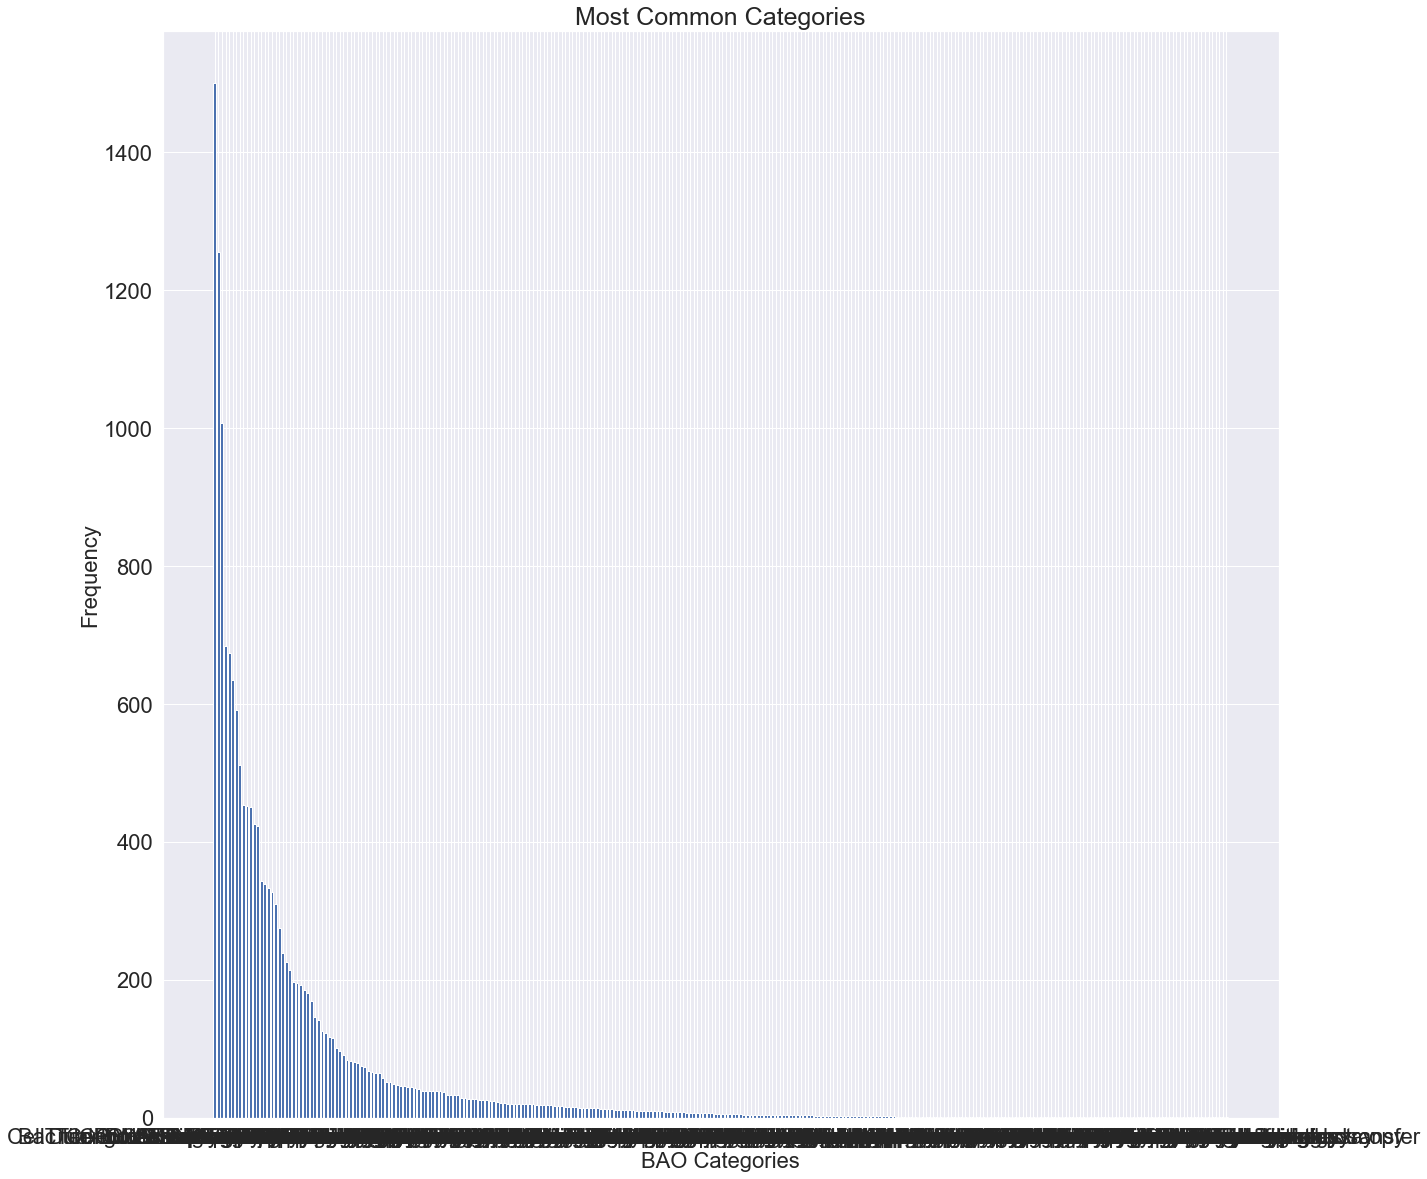

In [7]:
#Bar graph of frequency of images vs BAO categories
fig = plt.figure(figsize=(20,20))
plt.bar(df.columns[:],freq)
plt.title("Most Common Categories", fontsize = 25)
plt.xlabel("BAO Categories" , fontsize = 22)
plt.ylabel("Frequency", fontsize = 22)
plt.show()

In [8]:
#Correlation of 284 labels
full= df.corr()
full.head(25)

,ATP quantitation,AUC,BacTiter-Glo Microbial Cell Viability Assay,Celigo S Imaging Cell Cytometer,CellTiter-Glo Luminescent Cell Viability Assay,Coomassie dye protein staining,Ct,DNA-RNA interaction assay,Dual-Luciferase Reporter Assay System,EC50,...,trypan blue cell staining,two-hybrid assay,viability measurement method,viral transduction method,vital dye staining,vital staining of cells,vital staining of organelles,voltage clamp,western blot,yeast two-hybrid assay
ATP quantitation,1.000000,-0.000299,-0.000095,-0.000232,-0.000268,-0.000777,-0.000189,-0.000134,-0.000592,-0.000164,...,-0.000189,-0.000212,-0.000212,-0.000134,-0.000095,-0.000268,-0.000134,-0.000189,-0.003504,-0.000189
AUC,-0.000299,1.000000,-0.000212,-0.000519,-0.000599,-0.001737,-0.000424,-0.000299,-0.001324,-0.000367,...,-0.000424,-0.000474,-0.000474,-0.000299,-0.000212,-0.000599,-0.000299,-0.000424,-0.007837,-0.000424
BacTiter-Glo Microbial Cell Viability Assay,-0.000095,-0.000212,1.000000,-0.000164,-0.000189,-0.000549,-0.000134,-0.000095,-0.000419,-0.000116,...,-0.000134,-0.000150,-0.000150,-0.000095,-0.000067,-0.000189,-0.000095,-0.000134,-0.002477,-0.000134
Celigo S Imaging Cell Cytometer,-0.000232,-0.000519,-0.000164,1.000000,-0.000464,-0.001345,-0.000328,-0.000232,-0.001025,-0.000284,...,-0.000328,-0.000367,-0.000367,-0.000232,-0.000164,-0.000464,-0.000232,-0.000328,-0.006070,-0.000328
CellTiter-Glo Luminescent Cell Viability Assay,-0.000268,-0.000599,-0.000189,-0.000464,1.000000,-0.001553,-0.000379,-0.000268,-0.001184,-0.000328,...,-0.000379,-0.000423,-0.000423,-0.000268,-0.000189,-0.000536,-0.000268,-0.000379,-0.007009,-0.000379
Coomassie dye protein staining,-0.000777,-0.001737,-0.000549,-0.001345,-0.001553,1.000000,-0.001098,-0.000777,-0.003433,-0.000951,...,-0.001098,-0.001228,-0.001228,-0.000777,-0.000549,-0.001553,-0.000777,-0.001098,-0.009490,-0.001098
Ct,-0.000189,-0.000424,-0.000134,-0.000328,-0.000379,-0.001098,1.000000,-0.000189,-0.000837,-0.000232,...,-0.000268,-0.000299,-0.000299,-0.000189,-0.000134,-0.000379,-0.000189,-0.000268,-0.004955,-0.000268
DNA-RNA interaction assay,-0.000134,-0.000299,-0.000095,-0.000232,-0.000268,-0.000777,-0.000189,1.000000,-0.000592,-0.000164,...,-0.000189,-0.000212,-0.000212,-0.000134,-0.000095,-0.000268,-0.000134,-0.000189,-0.003504,-0.000189
Dual-Luciferase Reporter Assay System,-0.000592,-0.001324,-0.000419,-0.001025,-0.001184,-0.003433,-0.000837,-0.000592,1.000000,-0.000725,...,-0.000837,-0.000936,-0.000936,-0.000592,-0.000419,-0.001184,-0.000592,-0.000837,-0.015492,-0.000837
EC50,-0.000164,-0.000367,-0.000116,-0.000284,-0.000328,-0.000951,-0.000232,-0.000164,-0.000725,1.000000,...,-0.000232,-0.000259,-0.000259,-0.000164,-0.000116,-0.000328,-0.000164,-0.000232,-0.004291,-0.000232


In [9]:
categies_occurance = df.sum(axis=0)
categies_occurance

ATP quantitation                                     2
AUC                                                 10
BacTiter-Glo Microbial Cell Viability Assay          1
Celigo S Imaging Cell Cytometer                      6
CellTiter-Glo Luminescent Cell Viability Assay       8
                                                  ... 
vital staining of cells                              8
vital staining of organelles                         2
voltage clamp                                        4
western blot                                      1255
yeast two-hybrid assay                               4
Length: 284, dtype: int64

In [10]:
#BAO categories above 100 counts
most_common = categies_occurance[categies_occurance>98].sort_values(0,ascending = False)
most_common = pd.DataFrame(most_common)
most_common

,0
gene expression assay,1501
western blot,1255
immunoblot,1008
phosphorylation assay,684
localization assay,674
immunoprecipitation,635
image analysis method,591
cell number determination,512
quantitative PCR,454
confocal microscopy,452


In [11]:
most_common[0]

gene expression assay                     1501
western blot                              1255
immunoblot                                1008
phosphorylation assay                      684
localization assay                         674
immunoprecipitation                        635
image analysis method                      591
cell number determination                  512
quantitative PCR                           454
confocal microscopy                        452
fluorescence microscopy                    451
flow cytometry                             427
imaging method                             423
quantitative reverse transcription PCR     344
fluorescence intensity                     340
binding assay                              333
fluorescence method                        328
protein-protein interaction assay          311
morphological phenotype                    275
immunohistochemistry                       239
cell growth assay                          226
intensity par

In [12]:
#New Dataframe of only most common 35 BAO Categories
new_df = df[['gene expression assay',
'western blot',
'immunoblot',
'phosphorylation assay',
'localization assay',
'immunoprecipitation',
'image analysis method',
'cell number determination',
'quantitative PCR',
'confocal microscopy',
'fluorescence microscopy',
'flow cytometry',
'imaging method',
'quantitative reverse transcription PCR',
'fluorescence intensity',
'binding assay',
'fluorescence method',
'protein-protein interaction assay',
'morphological phenotype',
'immunohistochemistry',
'cell growth assay',
'intensity parameter',
'ELISA',
'affinity purification method',
'rna-seq method',
'mass spectrometry',
'cell proliferation assay',
'measured concentration',
'cell viability assay',
'real-time PCR',
'organism behavior assay',
'counting parameter',
'morphology assessment method',
'transmission electron microscopy',
'electrophysiological method']]
new_df

,gene expression assay,western blot,immunoblot,phosphorylation assay,localization assay,immunoprecipitation,image analysis method,cell number determination,quantitative PCR,confocal microscopy,...,mass spectrometry,cell proliferation assay,measured concentration,cell viability assay,real-time PCR,organism behavior assay,counting parameter,morphology assessment method,transmission electron microscopy,electrophysiological method
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14937,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
14938,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
14939,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [13]:
#Top 35 BAO categories counts in descending order
new_freq = new_df.iloc[:].sum().values
new_freq= np.sort(new_freq)[::-1]
new_freq

array([1501, 1255, 1008,  684,  674,  635,  591,  512,  454,  452,  451,
        427,  423,  344,  340,  333,  328,  311,  275,  239,  226,  214,
        198,  196,  193,  186,  181,  170,  147,  127,  124,  117,  116,
        102,   11], dtype=int64)

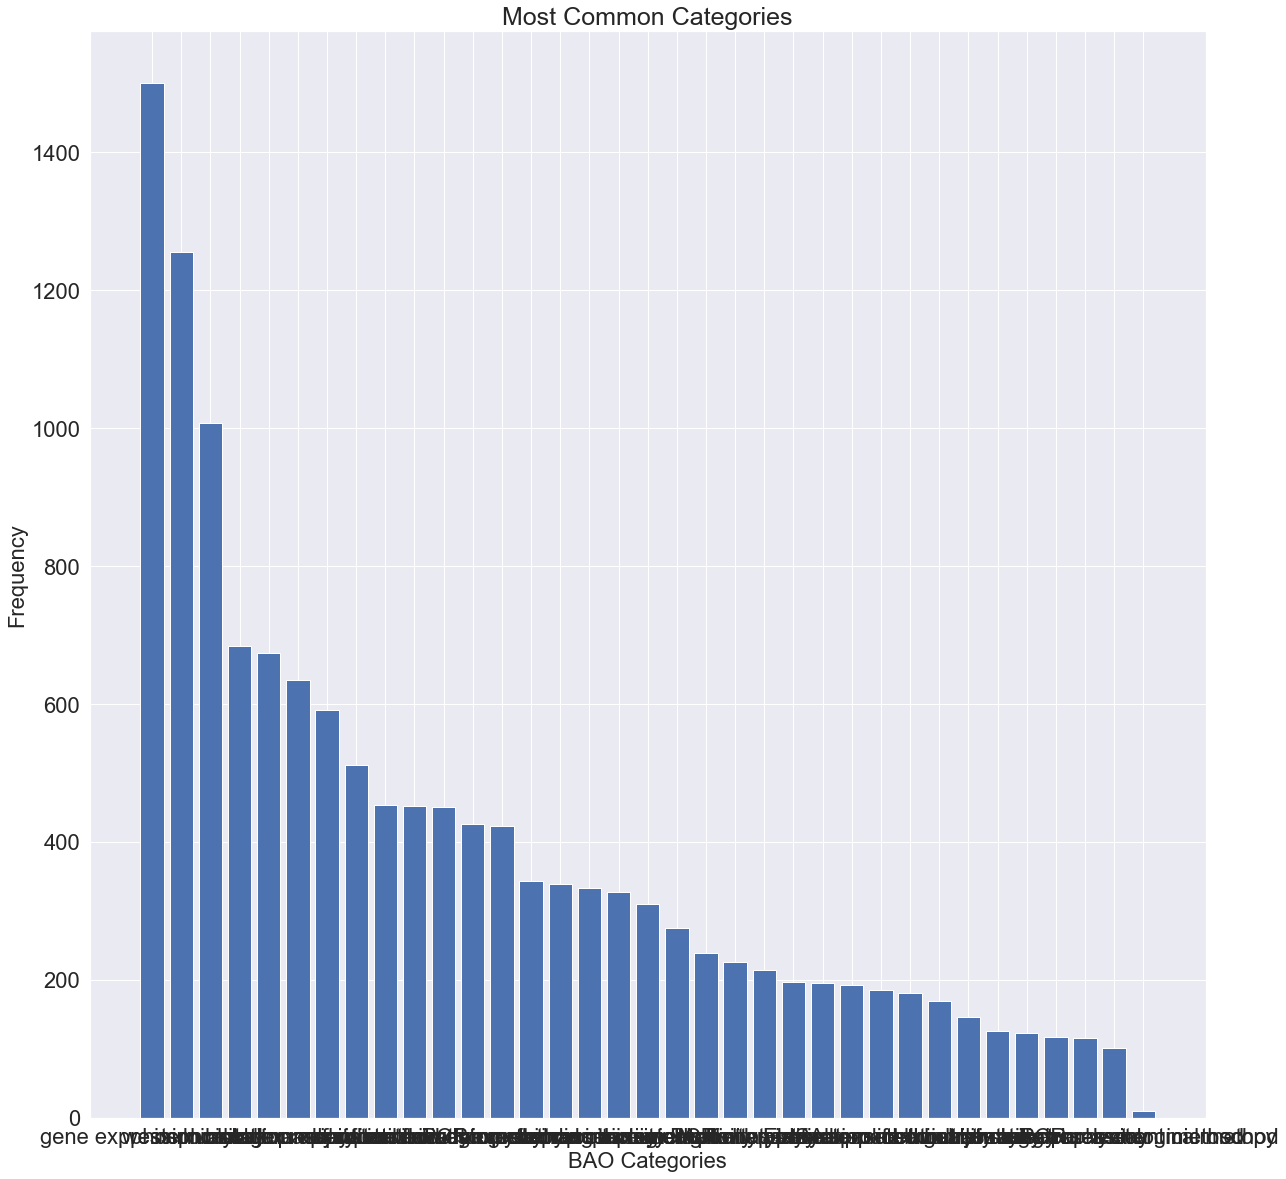

In [14]:
#Top 35 BAO categories bar graph, frequency of images vs BAO categories
fig = plt.figure(figsize=(20,20))
plt.bar(new_df.columns[:],new_freq)
plt.title("Most Common Categories", fontsize = 25)
plt.xlabel("BAO Categories" , fontsize = 22)
plt.ylabel("Frequency", fontsize = 22)
plt.show()

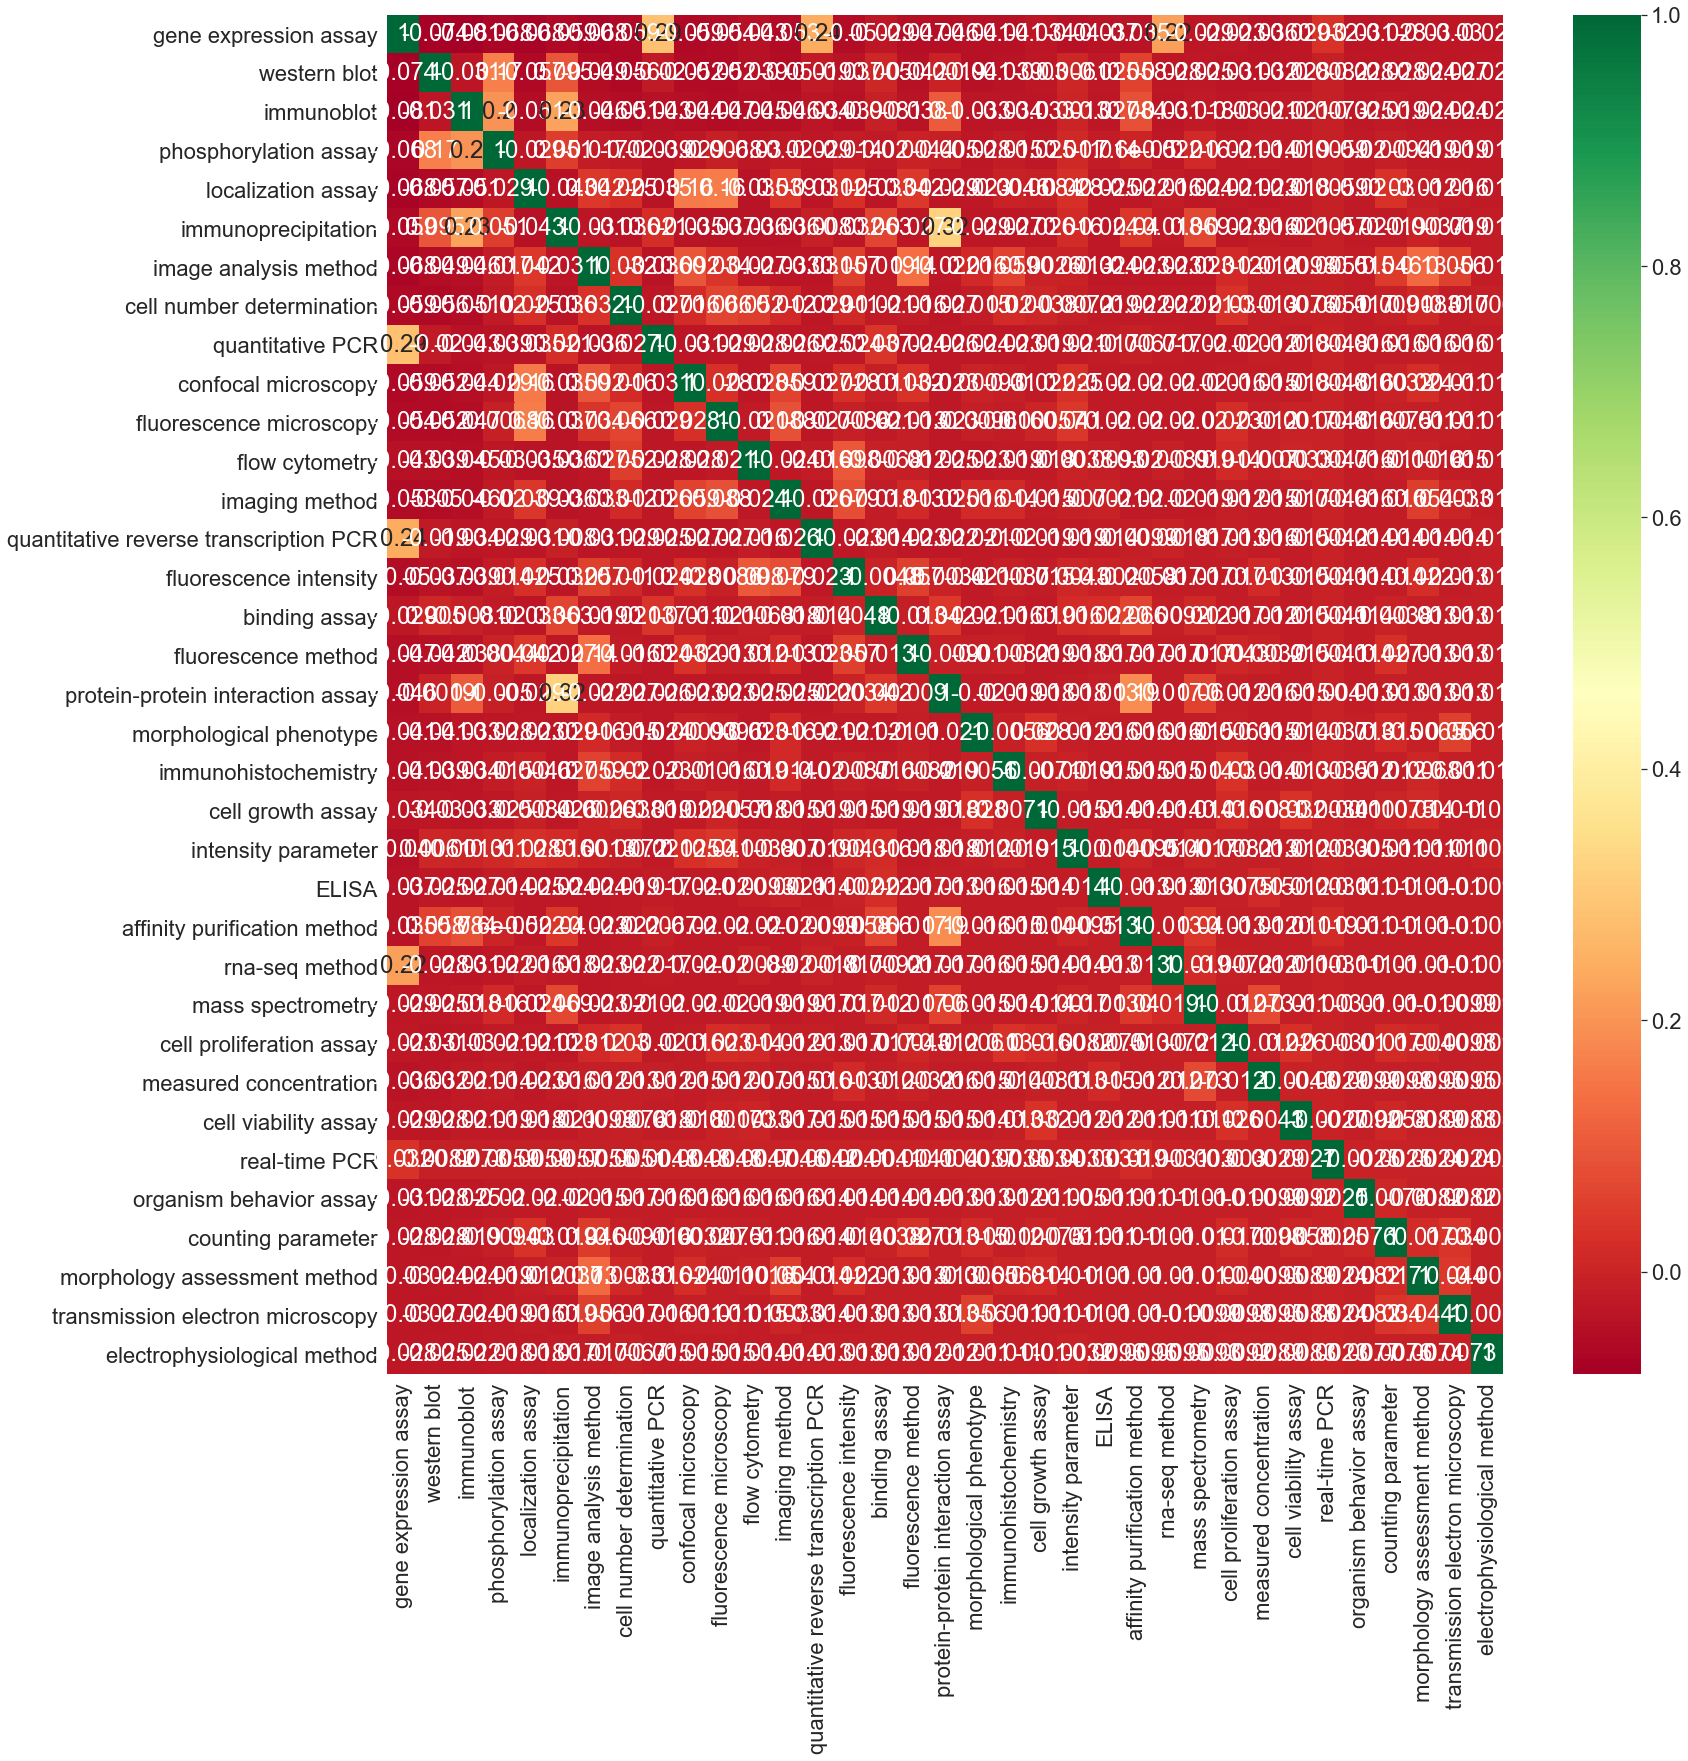

In [15]:
#Correlation matrix of top 35 BAO categories
corrmat = new_df.corr()
top_35_features = corrmat.index
plt.figure(figsize = (25,25))
#plot heat map
heat_meap = sns.heatmap(df[top_35_features].corr(), annot = True , cmap = "RdYlGn")

In [16]:
#top 10 most common BAO categories
new_df_10 = df[["gene expression assay", "western blot", "immunoblot", "phosphorylation assay", "immunoprecipitation", "localization assay", "image analysis method", "confocal microscopy", "flow cytometry", "fluorescence microscopy"]]
new_df_10

,gene expression assay,western blot,immunoblot,phosphorylation assay,immunoprecipitation,localization assay,image analysis method,confocal microscopy,flow cytometry,fluorescence microscopy
0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14936,0,0,0,0,0,0,0,0,0,1
14937,0,0,0,0,0,0,0,0,0,0
14938,0,0,0,0,0,0,0,0,0,0
14939,0,0,0,0,0,0,0,0,0,0


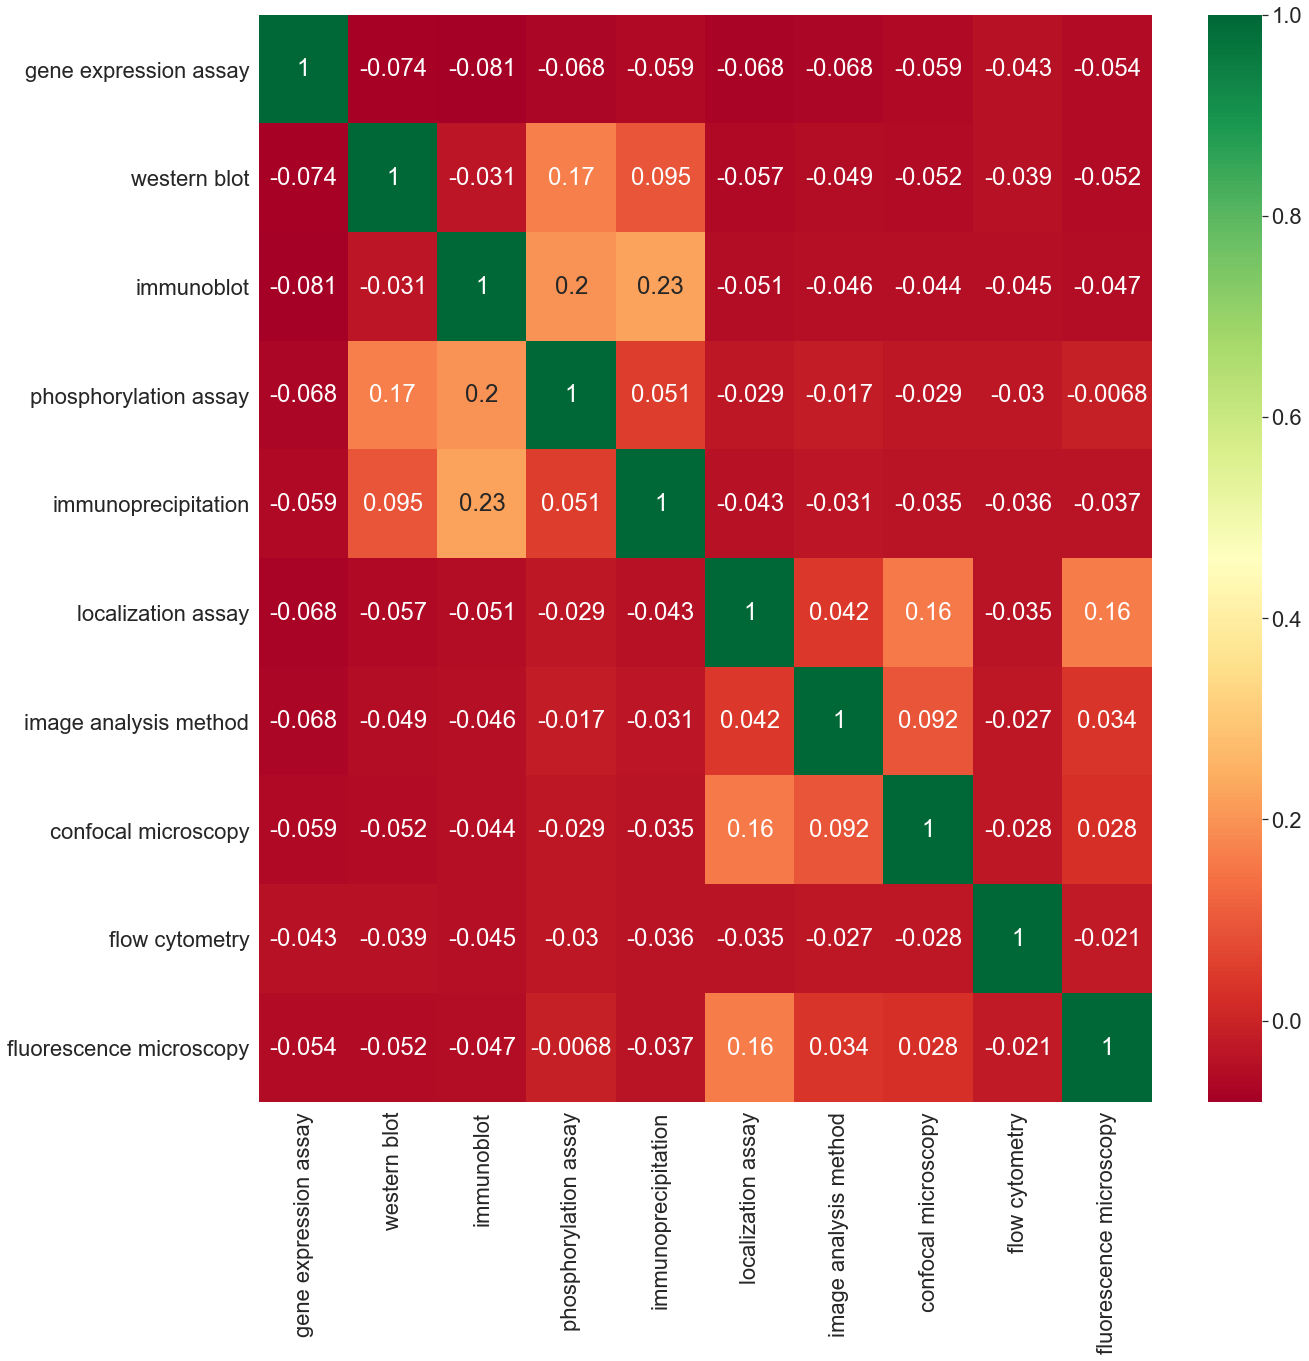

In [17]:
#Correlation matrix for top 10 BAO Categories
corrmat = new_df_10.corr()
top_10_features = corrmat.index
plt.figure(figsize = (20,20))
#plot heat map
heat_meap = sns.heatmap(df[top_10_features].corr(), annot = True , cmap = "RdYlGn")

In [18]:
#Correlation in long table format of 284 BAO Categories
list1 = list(df.columns)
label_a = []
label_b = []
final_list = []
for i in range(0,len(list1)):
    for j in range(i+1,len(list1)):
        label_a.append(list1[i])
        label_b.append(list1[j])
        x = df[list1[i]].corr(df[list1[j]],method = "pearson")
        final_list.append(x)
data = {'label A':label_a, 'label B':label_b, 'correlation':final_list}

In [19]:
corr = pd.DataFrame(data)
corr

,label A,label B,correlation
0,ATP quantitation,AUC,-0.000299
1,ATP quantitation,BacTiter-Glo Microbial Cell Viability Assay,-0.000095
2,ATP quantitation,Celigo S Imaging Cell Cytometer,-0.000232
3,ATP quantitation,CellTiter-Glo Luminescent Cell Viability Assay,-0.000268
4,ATP quantitation,Coomassie dye protein staining,-0.000777
...,...,...,...
40181,vital staining of organelles,western blot,-0.003504
40182,vital staining of organelles,yeast two-hybrid assay,-0.000189
40183,voltage clamp,western blot,-0.004955
40184,voltage clamp,yeast two-hybrid assay,-0.000268


In [20]:
#Top 14 highly, moderately, weekly correlated BAO categories
corr = corr.sort_values('correlation', ascending = False)
corr.head(14)

,label A,label B,correlation
11723,beta galactosidase enzyme activity assay,three-hybrid assay,1.000000
21655,current clamp,voltage clamp,0.670723
4801,Ki,inhibition,0.577312
12723,bio layer interferometry,competitive binding,0.577312
355,AUC,chemiluminescence,0.551655
23454,dot immunobinding assay,percent recovery,0.499950
26183,fluorescent DNA hybridization probe method,in situ immunoassay,0.499950
31143,kcat,km,0.499933
20678,confocal microscope,vital staining of cells,0.472095
23989,electrophysiological method,patch clamp,0.441975


In [21]:
#defining correlation function, we can select highly correlated features
def correlation(categories, threshold ):
    column_corr = set()
    correlation_matrix = categories.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j])>threshold:
                colname = correlation_matrix.columns[i]
                column_corr.add(colname)
                
    return column_corr

thrershold>0.9 - strongly correlated

threshold>0.7 - moderately correlated

threshold>0.4 - weakly correlated

In [22]:
#Check how many BAO categories are above given threshold
correlation = correlation(df , 0.5)
len(set(correlation))

5

In [28]:
#Loading dataset
#Resizing image dimensions
#Converting image into array and Standardizing
image_height = 96 #64, 128, 152
image_width = 96  #64, 128, 152
images = []  
for i in tqdm(range(df.shape[0])):
    path = "dataset/" + str(label["panel_id"][i])+ ".jpg"
    image = tf.keras.preprocessing.image
    img = image.load_img(path, target_size = (image_height,image_width,3))
    img = image.img_to_array(img)
    img = img/255.0
    images.append(img)
    
X = np.array(images)

100%|████████████████████████████████████████████████████████████████████████████| 14941/14941 [04:31<00:00, 55.05it/s]


100807
['densitometric scan', 'phosphorylation assay', 'western blot']


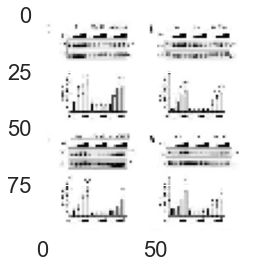

In [29]:
print(label['panel_id'][300])
plt.imshow(images[300])
print(label['bao_categories'][300])

In [30]:
#Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, df, random_state=20, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11952, 96, 96, 3), (2989, 96, 96, 3), (11952, 284), (2989, 284))

In [31]:
#CNN model
#Try changing different layers with different filter size
model = Sequential()

#Try changing filter size
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(image_height,image_width,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(284, activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 47, 47, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        4

In [33]:
#Calculating binary cross entropy for each label.
#opt= tf.keras.optimizers.SGD(learning_rate=0.01)
#optimizer = opt
#Adam shows good result compared to SGD
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='accuracy')

In [34]:
#splitting data into training and validation
#training the model, try changing different epochs and batch_size
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split = 0.2)

Epoch 1/25
299/299 [==============================] - 42s 119ms/step - loss: 0.0493 - accuracy: 0.1078 - val_loss: 0.0198 - val_accuracy: 0.0870
Epoch 2/25
299/299 [==============================] - 35s 116ms/step - loss: 0.0181 - accuracy: 0.1369 - val_loss: 0.0183 - val_accuracy: 0.1138
Epoch 3/25
299/299 [==============================] - 35s 117ms/step - loss: 0.0175 - accuracy: 0.1516 - val_loss: 0.0205 - val_accuracy: 0.1071
Epoch 4/25
299/299 [==============================] - 36s 120ms/step - loss: 0.0169 - accuracy: 0.1594 - val_loss: 0.0178 - val_accuracy: 0.1389
Epoch 5/25
299/299 [==============================] - 35s 118ms/step - loss: 0.0164 - accuracy: 0.1728 - val_loss: 0.0191 - val_accuracy: 0.0987
Epoch 6/25
299/299 [==============================] - 36s 119ms/step - loss: 0.0158 - accuracy: 0.1776 - val_loss: 0.0187 - val_accuracy: 0.1317
Epoch 7/25
299/299 [==============================] - 35s 116ms/step - loss: 0.0151 - accuracy: 0.2002 - val_loss: 0.0190 - val_ac

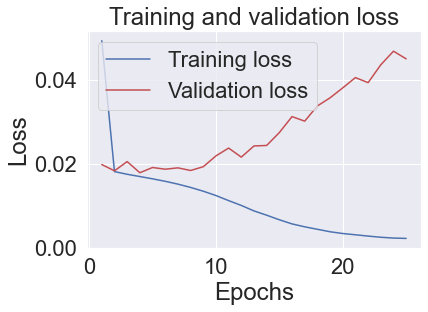

In [35]:
#plot the training and validation loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

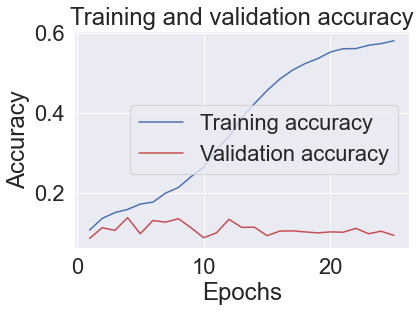

In [36]:
#plot the training and validation accuracy at each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
#loss and evaluation accuracy
loss, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

94/94 [==============================] - 3s 37ms/step - loss: 0.0467 - accuracy: 0.0997
Accuracy =  9.969889372587204 %


In [38]:
#Prediction of model on test data
y_pred = model.predict(X_test)
y_pred.shape

(2989, 284)

In [39]:
#predicted arrays
y_pred

array([[4.58789340e-10, 1.83600964e-13, 2.74351323e-11, ...,
        1.85545121e-11, 4.21876818e-01, 3.57586377e-10],
       [4.98747355e-08, 9.80681869e-10, 3.71311046e-07, ...,
        5.08639566e-08, 2.90373903e-09, 2.23521141e-07],
       [1.39494531e-15, 1.33664454e-20, 3.35585494e-19, ...,
        8.39286904e-11, 1.71351761e-01, 1.21498796e-12],
       ...,
       [2.07626952e-13, 1.89158021e-12, 1.44682714e-12, ...,
        8.58608703e-14, 1.61130665e-05, 2.77134565e-11],
       [5.64056677e-07, 1.64199465e-09, 1.84687428e-06, ...,
        4.50834969e-09, 6.99770451e-03, 5.10617247e-06],
       [3.81692402e-08, 1.29406699e-05, 4.15569461e-13, ...,
        8.43072634e-09, 2.82154552e-15, 3.07385828e-09]], dtype=float32)

In [40]:
# Function for Computing Macro Average Precision
def label_based_macro_precision(y_true, y_pred):
    numerator = np.sum(np.logical_and(y_true, y_pred), axis = 0)
    denominator = np.sum(y_pred, axis = 0)
    precision_per_class = numerator/denominator
    precision = np.mean(precision_per_class)
    return precision

macro_precision = label_based_macro_precision(y_test, y_pred) 

print(f"Macro Average Precision: {macro_precision}")

Macro Average Precision: 569.3879635393985


In [41]:
#Function for Computing Macro Average Recall
def label_based_macro_recall(y_true, y_pred):
    numerator = np.sum(np.logical_and(y_true, y_pred), axis = 0)
    denominator = np.sum(y_true, axis = 0)
    recall_per_class = numerator/denominator
    recall = np.mean(recall_per_class)
    return recall

macro_recall = label_based_macro_recall(y_test, y_pred) 
print(f"Macro Average Recall: {macro_recall}")

Macro Average Recall: 1.0


In [42]:
#Function for Computing Micro Average Precision
def label_based_micro_precision(y_true, y_pred):
    numerator = np.sum(np.logical_and(y_true, y_pred))
    denominator = np.sum(y_pred)
    return numerator/denominator

micro_precision= label_based_micro_precision(y_test, y_pred)
print(f"Micro Average Precision: {micro_precision}")

Micro Average Precision: ATP quantitation                                  0.000437
AUC                                               0.000437
BacTiter-Glo Microbial Cell Viability Assay       0.000000
Celigo S Imaging Cell Cytometer                   0.000000
CellTiter-Glo Luminescent Cell Viability Assay    0.000873
                                                    ...   
vital staining of cells                           0.001310
vital staining of organelles                      0.000000
voltage clamp                                     0.000437
western blot                                      0.116144
yeast two-hybrid assay                            0.000000
Length: 284, dtype: float64


In [43]:
# Function for Computing Micro Average Recall 
def label_based_micro_recall(y_true, y_pred):
    numerator = np.sum(np.logical_and(y_true, y_pred))
    denominator = np.sum(y_true)
    return numerator/denominator

micro_recall= label_based_micro_recall(y_test, y_pred)
print(f"Micro Average Recall: {micro_recall}")

Micro Average Recall: ATP quantitation                                  1.0
AUC                                               1.0
BacTiter-Glo Microbial Cell Viability Assay       NaN
Celigo S Imaging Cell Cytometer                   NaN
CellTiter-Glo Luminescent Cell Viability Assay    1.0
                                                 ... 
vital staining of cells                           1.0
vital staining of organelles                      NaN
voltage clamp                                     1.0
western blot                                      1.0
yeast two-hybrid assay                            NaN
Length: 284, dtype: float64


In [44]:
#top 35 BAO categories dataframe
new_df

,gene expression assay,western blot,immunoblot,phosphorylation assay,localization assay,immunoprecipitation,image analysis method,cell number determination,quantitative PCR,confocal microscopy,...,mass spectrometry,cell proliferation assay,measured concentration,cell viability assay,real-time PCR,organism behavior assay,counting parameter,morphology assessment method,transmission electron microscopy,electrophysiological method
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14937,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
14938,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
14939,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [64]:
#splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, new_df, random_state=20, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11952, 96, 96, 3), (2989, 96, 96, 3), (11952, 35), (2989, 35))

In [65]:
#CNN model
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3, 3), activation="relu", input_shape=(image_height,image_width,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dense(35, activation='sigmoid'))

In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 94, 94, 8)         224       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 47, 47, 8)         0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 47, 47, 8)         32        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 45, 45, 16)        1168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 22, 22, 16)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 22, 22, 16)        64        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 20, 32)       

In [67]:
#Calculating binary cross entropy for each label.
#opt= tf.keras.optimizers.SGD(learning_rate=0.01)
#optimizer = opt
#Adam shows good result compared to SGD
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='accuracy')

In [68]:
#Splitting data into training and validation
#training the model, try changing different epochs and batch_size
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split = 0.2)


Epoch 1/15
299/299 [==============================] - 36s 105ms/step - loss: 0.1279 - accuracy: 0.3111 - val_loss: 0.1111 - val_accuracy: 0.3735
Epoch 2/15
299/299 [==============================] - 30s 101ms/step - loss: 0.0975 - accuracy: 0.3783 - val_loss: 0.1009 - val_accuracy: 0.1974
Epoch 3/15
299/299 [==============================] - 30s 101ms/step - loss: 0.0929 - accuracy: 0.3876 - val_loss: 0.0985 - val_accuracy: 0.3739
Epoch 4/15
299/299 [==============================] - 30s 100ms/step - loss: 0.0890 - accuracy: 0.3937 - val_loss: 0.1113 - val_accuracy: 0.1481
Epoch 5/15
299/299 [==============================] - 30s 101ms/step - loss: 0.0846 - accuracy: 0.3979 - val_loss: 0.0996 - val_accuracy: 0.2877
Epoch 6/15
299/299 [==============================] - 31s 103ms/step - loss: 0.0792 - accuracy: 0.3867 - val_loss: 0.1041 - val_accuracy: 0.3580
Epoch 7/15
299/299 [==============================] - 30s 101ms/step - loss: 0.0735 - accuracy: 0.3961 - val_loss: 0.1073 - val_ac

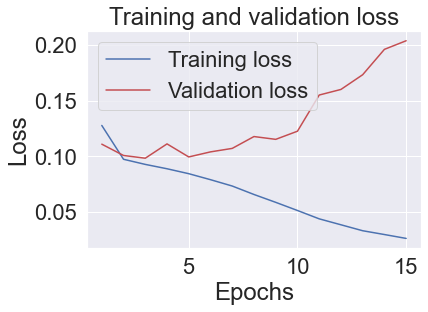

In [69]:
#plot the training and validation loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

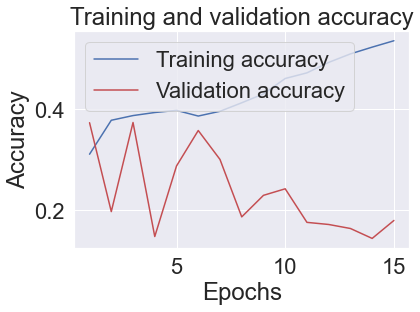

In [70]:
#plot the training and validation accuracy at each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [71]:
#loss and accuracy of the model
loss, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

94/94 [==============================] - 2s 24ms/step - loss: 0.2130 - accuracy: 0.1877
Accuracy =  18.76881867647171 %


In [72]:
#Prediction of model on test data
y_pred = model.predict(X_test)
y_pred.shape

(2989, 35)

In [73]:
#model predicted values
y_pred

array([[2.6748791e-07, 9.7779167e-01, 6.0899830e-01, ..., 2.2174584e-08,
        5.8769909e-09, 1.2764377e-09],
       [2.1389127e-04, 1.5367351e-07, 1.1779455e-09, ..., 1.9361660e-05,
        2.0332006e-07, 3.3351739e-06],
       [4.9989691e-08, 9.9574655e-01, 6.5173209e-03, ..., 3.9282114e-13,
        9.4193320e-10, 1.1432141e-09],
       ...,
       [9.9885595e-01, 1.7188787e-03, 1.1530649e-06, ..., 4.1411204e-07,
        4.2527276e-07, 2.0394459e-09],
       [8.0758333e-04, 3.1155652e-01, 1.2477368e-02, ..., 1.9739948e-06,
        3.2387516e-06, 2.2791843e-05],
       [3.8713790e-08, 1.5684421e-11, 6.1560655e-08, ..., 5.4422795e-05,
        5.7468466e-08, 1.4620145e-09]], dtype=float32)

In [74]:
# Function for Computing Macro Average Precision
def label_based_macro_precision(y_true, y_pred):
    numerator = np.sum(np.logical_and(y_true, y_pred), axis = 0)
    denominator = np.sum(y_pred, axis = 0)
    precision_per_class = numerator/denominator 
    precision = np.mean(precision_per_class)
    return precision

macro_precision = label_based_macro_precision(y_test, y_pred) 

print(f"Macro Average Precision: {macro_precision}")

Macro Average Precision: 2.692151314439929


In [75]:
#Function for Computing Macro Average Recall
def label_based_macro_recall(y_true, y_pred):
    numerator = np.sum(np.logical_and(y_true, y_pred), axis = 0)
    denominator = np.sum(y_true, axis = 0)
    recall_per_class = numerator/denominator
    recall = np.mean(recall_per_class)
    return recall

macro_recall = label_based_macro_recall(y_test, y_pred) 
print(f"Macro Average Recall: {macro_recall}")

Macro Average Recall: 1.0


In [76]:
#Function for Computing Micro Average Precision
def label_based_micro_precision(y_true, y_pred):
    numerator = np.sum(np.logical_and(y_true, y_pred))
    denominator = np.sum(y_pred)
    return numerator/denominator

micro_precision= label_based_micro_precision(y_test, y_pred)
print(f"Micro Average Precision: {micro_precision}")

Micro Average Precision: gene expression assay                     0.133789
western blot                              0.117451
immunoblot                                0.084335
phosphorylation assay                     0.062700
localization assay                        0.064907
immunoprecipitation                       0.057843
image analysis method                     0.055193
cell number determination                 0.047246
quantitative PCR                          0.041505
confocal microscopy                       0.040181
fluorescence microscopy                   0.039298
flow cytometry                            0.038856
imaging method                            0.037531
quantitative reverse transcription PCR    0.031350
fluorescence intensity                    0.027376
binding assay                             0.026934
fluorescence method                       0.030467
protein-protein interaction assay         0.026493
morphological phenotype                   0.025168
immuno

In [77]:
# Function for Computing Micro Average Recall 
def label_based_micro_recall(y_true, y_pred):
    numerator = np.sum(np.logical_and(y_true, y_pred))
    denominator = np.sum(y_true)
    return numerator/denominator

micro_recall= label_based_micro_recall(y_test, y_pred)
print(f"Micro Average Recall: {micro_recall}")

Micro Average Recall: gene expression assay                     1.0
western blot                              1.0
immunoblot                                1.0
phosphorylation assay                     1.0
localization assay                        1.0
immunoprecipitation                       1.0
image analysis method                     1.0
cell number determination                 1.0
quantitative PCR                          1.0
confocal microscopy                       1.0
fluorescence microscopy                   1.0
flow cytometry                            1.0
imaging method                            1.0
quantitative reverse transcription PCR    1.0
fluorescence intensity                    1.0
binding assay                             1.0
fluorescence method                       1.0
protein-protein interaction assay         1.0
morphological phenotype                   1.0
immunohistochemistry                      1.0
cell growth assay                         1.0
intensity pa

In [78]:
#the most frequent label dataframe i.e., "gene expression assay"
df_1 = df[["gene expression assay"]]

In [79]:
df_1

,gene expression assay
0,0
1,0
2,0
3,1
4,1
...,...
14936,0
14937,0
14938,0
14939,0


In [80]:
#Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, df_1, random_state=20, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11952, 96, 96, 3), (2989, 96, 96, 3), (11952, 1), (2989, 1))

In [81]:
#CNN model
#try changing layer size and and filter size
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(image_height,image_width,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [82]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 47, 47, 16)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 47, 47, 16)        64        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 45, 45, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 22, 22, 16)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 22, 22, 16)        64        
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 32)       

In [83]:
#Calculating binary cross entropy for each label.
#opt= tf.keras.optimizers.SGD(learning_rate=0.01)
#optimizer = opt
#Adam shows good result compared to SGD
#learning rate 0.001 shows good result
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='accuracy')

In [84]:
#Splitting data into training and validation
#training the model, try changing different epochs and batch_size
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)


Epoch 1/10
299/299 [==============================] - 36s 118ms/step - loss: 0.3231 - accuracy: 0.8947 - val_loss: 0.2742 - val_accuracy: 0.9126
Epoch 2/10
299/299 [==============================] - 35s 117ms/step - loss: 0.2902 - accuracy: 0.8971 - val_loss: 0.3228 - val_accuracy: 0.9126
Epoch 3/10
299/299 [==============================] - 34s 115ms/step - loss: 0.2682 - accuracy: 0.8979 - val_loss: 0.2827 - val_accuracy: 0.9122
Epoch 4/10
299/299 [==============================] - 35s 115ms/step - loss: 0.2436 - accuracy: 0.9050 - val_loss: 0.3003 - val_accuracy: 0.9076
Epoch 5/10
299/299 [==============================] - 35s 116ms/step - loss: 0.2054 - accuracy: 0.9158 - val_loss: 0.3263 - val_accuracy: 0.9038
Epoch 6/10
299/299 [==============================] - 35s 116ms/step - loss: 0.1672 - accuracy: 0.9358 - val_loss: 0.4042 - val_accuracy: 0.8218
Epoch 7/10
299/299 [==============================] - 35s 116ms/step - loss: 0.1215 - accuracy: 0.9541 - val_loss: 0.4648 - val_ac

In [85]:
#loss and accuracy of model
loss, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

94/94 [==============================] - 3s 30ms/step - loss: 0.6070 - accuracy: 0.8387
Accuracy =  83.87420773506165 %


In [86]:
#Prediction of model on test data
y_pred = model.predict(X_test)
y_pred.shape

(2989, 1)

In [87]:
#model predicted values
y_pred

array([[2.1105558e-07],
       [8.1942829e-07],
       [1.7170941e-09],
       ...,
       [1.4850819e-01],
       [2.8260618e-02],
       [4.0910840e-02]], dtype=float32)

In [88]:
#predicted values if greater than 1 then it's "gene expression assay" else not
y_pred = np.where(y_pred > 0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [89]:
#total predicted "gene expression assay"
y_pred.sum()

277

In [90]:
# number of images annotated as "gene expression assay", actual "gene expression assay"
y_test.sum()

gene expression assay    303
dtype: int64

In [91]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [92]:
cm

array([[2458,  228],
       [ 254,   49]], dtype=int64)

In [110]:
#plot confusion matrix
def print_confusion_matrix(confusion_matrix,class_names, figsize = (10,7), fontsize=12):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), ha='right', fontsize=fontsize)
    plt.xlabel('Truth')
    plt.ylabel('Prediction')

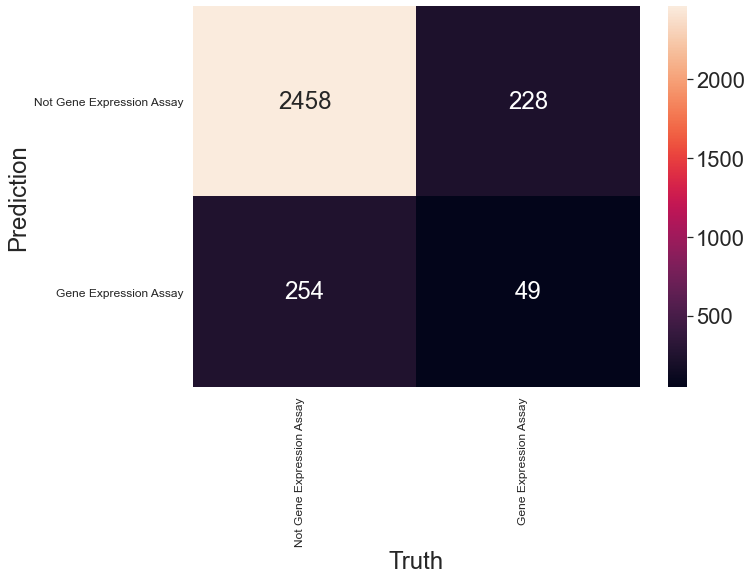

In [111]:
cm = confusion_matrix(y_test,y_pred)
print_confusion_matrix(cm,["Not Gene Expression Assay","Gene Expression Assay"])

In [112]:
#Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
precision

0.17689530685920576

In [113]:
#Recall
from sklearn.metrics import recall_score
recall =recall_score(y_test, y_pred)
recall

0.1617161716171617

In [114]:
#F1 Score
from sklearn.metrics import f1_score
f1_score = f1_score(y_test, y_pred)
f1_score

0.1689655172413793

### References
###### 1- https://github.com/bnsreenu/python_for_microscopists/blob/master/142-multi_label_classification.py
###### 2- https://medium.datadriveninvestor.com/a-survey-of-evaluation-metrics-for-multilabel-classification-bb16e8cd41cd